In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import History
import tensorflow
import keras_tuner
from keras_tuner import RandomSearch
from sklearn.ensemble import RandomForestRegressor
import random

# Compiling all Sequences.txt files together in a csv format

In [2]:
folder_path='C:\\Users\\ASUS\\Desktop\\ch5650\\sequences'
file_list = glob.glob(folder_path + "\\*.txt")

main_dataframe = pd.DataFrame(pd.read_csv(file_list[0],header=None))
main_dataframe=pd.DataFrame(np.reshape(np.array(main_dataframe),(1,-1)))


In [3]:

for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i],header=None)
    data=np.reshape(np.array(data),(1,-1))
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe,df],axis=0)
print(main_dataframe)

    0    1    2    3    4    5    6    7    8    9    ...  91   92   93   94   \
0   1.0  2.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  ...  2.0  2.0  2.0  1.0   
0   1.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  ...  1.0  1.0  2.0  1.0   
0   2.0  1.0  2.0  2.0  1.0  1.0  1.0  2.0  2.0  2.0  ...  1.0  2.0  2.0  1.0   
0   2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  ...  1.0  1.0  2.0  1.0   
0   2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  2.0  ...  1.0  1.0  2.0  1.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0   2.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  ...  1.0  1.0  2.0  1.0   
0   2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  2.0  ...  1.0  1.0  2.0  1.0   
0   2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  ...  1.0  1.0  2.0  1.0   
0   2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  ...  1.0  1.0  2.0  1.0   
0   2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  2.0  ...  1.0  1.0  2.0  1.0   

    95   96   97   98   99 

In [4]:
main_dataframe.head()
main_dataframe.to_csv('C:\\Users\\ASUS\\Desktop\\ch5650\\final_data.csv',index=False)


# Model Building

### Reading the csv file 

In [5]:
main_data=pd.read_csv('C:\\Users\\ASUS\\Desktop\\ch5650\\final_data.csv')
main_data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.69038
1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.31900
2,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,3.88633
3,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.20311
4,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.09394


**Distribution of values of Radius of gyration in the data**

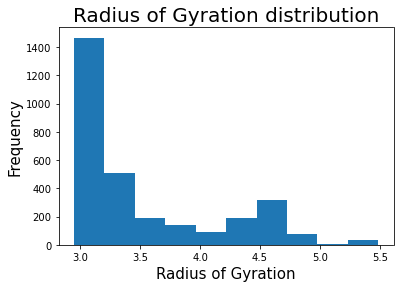

In [6]:
plt.hist(np.array(main_data.iloc[:,100]))
plt.xlabel('Radius of Gyration',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Radius of Gyration distribution',fontsize=20)
plt.show()

**Data Pre-processing**

In [7]:
x=main_data.iloc[:,0:100].values
y=main_data.iloc[:,100].values

In [10]:
le=LabelEncoder()
for i in range(0,100):
    x[:,i]=le.fit_transform(x[:,i])
    

In [11]:
random.seed(1)

**Splitting the dataset in training and test data**

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## 1st Neural Network Model
(**Without tuning**)


In [13]:
model= Sequential()
model.add(Dense(400,activation='relu',input_dim=100))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))


In [14]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
history1=model.fit(X_train,Y_train,epochs=300,batch_size=20,verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/300
122/122 [==============================] - 0s 4ms/step - loss: 0.5561 - mean_squared_error: 0.5561 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 2/300
122/122 [==============================] - 0s 3ms/step - loss: 0.1969 - mean_squared_error: 0.1969 - val_loss: 0.2007 - val_mean_squared_error: 0.2007
Epoch 3/300
122/122 [==============================] - 0s 2ms/step - loss: 0.1843 - mean_squared_error: 0.1843 - val_loss: 0.5447 - val_mean_squared_error: 0.5447
Epoch 4/300
122/122 [==============================] - 0s 2ms/step - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.4115 - val_mean_squared_error: 0.4115
Epoch 5/300
122/122 [==============================] - 0s 2ms/step - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.4774 - val_mean_squared_error: 0.4774
Epoch 6/300
122/122 [==============================] - 0s 2ms/step - loss: 0.1489 - mean_squared_error: 0.1489 - val_loss: 0.4374 - val_mean_squared_error: 0.4374
Epoch 7/300
122/122 [=

In [15]:
Y_pred=model.predict(X_test)


**Plot of mean squared error vs no. of epochs**

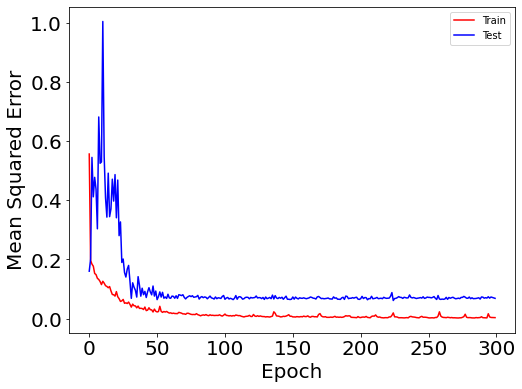

In [84]:


fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(history1.history['mean_squared_error'], 'r', label='Train')
ax.plot(history1.history['val_mean_squared_error'], 'b' ,label='Test')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Mean Squared Error', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)


**Plot of preedicted value vs actual value**

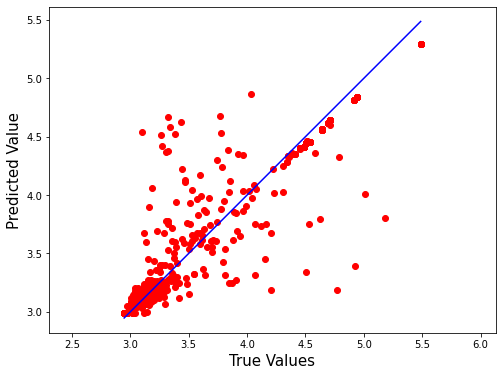

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred,c='r')
plt.ylim(3,6)
plt.xlim(3,6)

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Value', fontsize=15)
plt.axis('equal')
plt.show()

**Mean sqaured error for test data**

In [18]:
mean_squared_error(Y_test,Y_pred)

0.0687033888416519

**$R^2$ value for the above model**

In [19]:
r2_score(Y_test,Y_pred)

0.821964508393835

## 2nd Neural Network Model
**With Hyperparameter Tuning**

First, a function is defined that loops through to find optimum number of hidden layers and number of neurons in each hidden layer. An optimum dropout rate is chosen as well. Learning rate for Adam optimiser is tuned as well in the function.

In [61]:
def tuned_models(hp):
    model=Sequential()
    model.add(Dense(units=400,activation='relu',input_shape=[X_train.shape[1]]))
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                        min_value=40,
                                        max_value=400,
                                        step=20),
                               activation='relu'))
        model.add(Dropout(hp.Choice('rate',values=[0.1,0.2,0.4])))

    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error'])
    return model


Hyperband method is used for tuning. This method is based on the idea that when the hyperparameters gives us poor results, it spots it and doesn't continue to train the model with those hyperparameters. It is basically a cycle of picking the best models and training them a little bit more until we get the best model.

In [62]:
tuner_2=keras_tuner.Hyperband(tuned_models,
                     objective='val_mean_squared_error',
                     max_epochs=150,        
                     factor=5,
                     overwrite=True)

In [63]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 40, 'max_value': 400, 'step': 20, 'sampling': None}
rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.4], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [64]:
tuner_2.search(X_train, Y_train,
             epochs=100,
             validation_data=(X_test, Y_test))

Trial 272 Complete [00h 02m 17s]
val_mean_squared_error: 0.07475631684064865

Best val_mean_squared_error So Far: 0.056085314601659775
Total elapsed time: 00h 46m 33s
INFO:tensorflow:Oracle triggered exit


In [65]:
best_model = tuner_2.get_best_models()[0]


In [67]:
best_model_history=best_model.fit(X_train,Y_train,epochs=200,batch_size=20,verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/200
122/122 [==============================] - 1s 4ms/step - loss: 0.0508 - mean_squared_error: 0.0508 - mean_absolute_error: 0.1675 - val_loss: 0.1003 - val_mean_squared_error: 0.1003 - val_mean_absolute_error: 0.2246
Epoch 2/200
122/122 [==============================] - 1s 6ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - mean_absolute_error: 0.1735 - val_loss: 0.0763 - val_mean_squared_error: 0.0763 - val_mean_absolute_error: 0.1577
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 0.0481 - mean_squared_error: 0.0481 - mean_absolute_error: 0.1594 - val_loss: 0.0817 - val_mean_squared_error: 0.0817 - val_mean_absolute_error: 0.1884
Epoch 4/200
122/122 [==============================] - 1s 5ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - mean_absolute_error: 0.1647 - val_loss: 0.0664 - val_mean_squared_error: 0.0664 - val_mean_absolute_error: 0.1469
Epoch 5/200
122/122 [==============================] - 1s 7ms/step - loss: 0.0505 - mean_squ

In [68]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               40400     
_________________________________________________________________
dense_1 (Dense)              (None, 280)               112280    
_________________________________________________________________
dropout (Dropout)            (None, 280)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 180)               50580     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 181       
Total params: 203,441
Trainable params: 203,441
Non-trainable params: 0
__________________________________________________

**Mean Sqaured Error for test data**

In [69]:
Y_pred_2=best_model.predict(X_test)
mean_squared_error(Y_test,Y_pred_2)

0.05970742214028608

**Plot of Mean sqaured error vs no. of epochs**

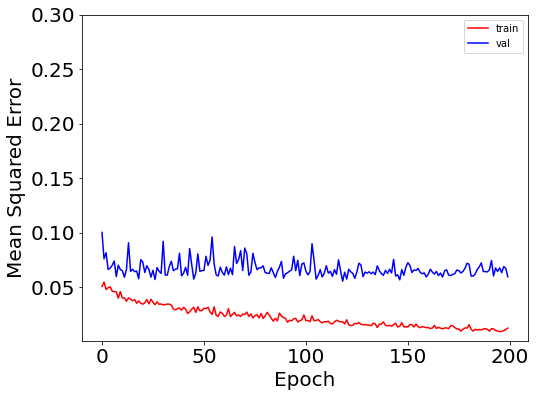

In [82]:

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(best_model_history.history['loss'], 'r', label='Train')
ax.plot(best_model_history.history['val_loss'], 'b' ,label='Test')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Mean Squared Error', fontsize=20)
ax.set_ylim([0.001,0.3])
ax.legend()
ax.tick_params(labelsize=20)


**Plot of actual vs predicted values**

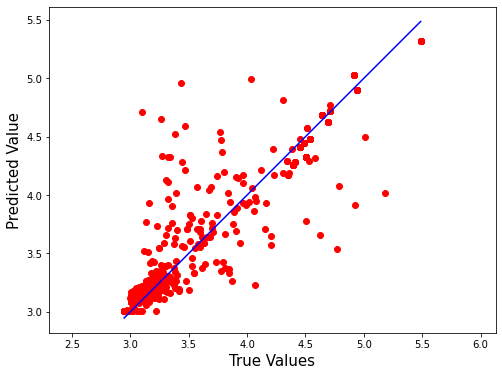

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred_2,c='r')
plt.ylim(3,6)
plt.xlim(3,6)

p1 = max(max(Y_pred_2), max(Y_test))
p2 = min(min(Y_pred_2), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Value', fontsize=15)
plt.axis('equal')
plt.show()

**$R^2$ Value for the above model**

In [71]:
r2_score(Y_test,Y_pred_2)

0.8452763330527574

In [73]:
best_model.save('C:\\Users\\ASUS\\Desktop\\ch5650')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\ASUS\Desktop\ch5650\assets


# Random Forest Regression

Different number of trees are used to observe which gives out the best result

In [72]:
n_estim=np.arange(100,520,20)
mse=[]
for i in range(len(n_estim)):
    regressor=RandomForestRegressor(n_estimators = n_estim[i], random_state = 0,verbose=1)
    regressor.fit(X_train,Y_train)
    pred=regressor.predict(X_test)
    mse.append(mean_squared_error(Y_test,pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

**Plot of mean sqaured error Vs number of trees**

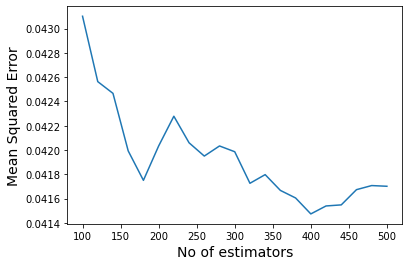

In [74]:
plt.plot(n_estim,np.array(mse))
plt.xlabel('No of estimators',fontsize=14)
plt.ylabel('Mean Squared Error',fontsize=14)
plt.show()

In [75]:
forest_regressor = RandomForestRegressor(n_estimators = 400, random_state = 0,verbose=1)
forest_regressor.fit(X_train, Y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   11.4s finished


RandomForestRegressor(n_estimators=400, random_state=0, verbose=1)

In [76]:
Y_pred_forest = forest_regressor.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished


**$R^2$ value for random forest model**

In [77]:
r2_score(Y_test,Y_pred_forest)

0.8925252802266679

**Mean sqaured error for test data**

In [78]:
mean_squared_error(Y_test,Y_pred_forest)

0.04147418807688526

**Plot of actual vs predicted data** 

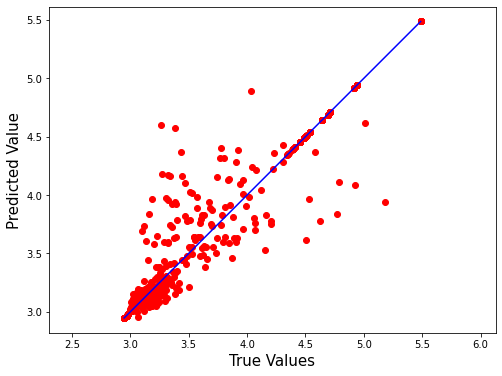

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred_forest,c='r')


p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Value', fontsize=15)
plt.axis('equal')
plt.show()